In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

from src.constants import CONFIG_DIR, INTERIM_DATA_DIR
from src.scripts import logreg as pipeline_steps
from src.utils import load_logreg_config

import warnings
warnings.filterwarnings(action="ignore")

# Load config

In [2]:
config = load_logreg_config(os.path.join(CONFIG_DIR, "logreg_config.yaml"))

## Data preparation

In [3]:
pipeline_steps.prepare_logreg_data(config)

sharp_train_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, config.data.data_paths.sharps_train_save))
sharp_test_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, config.data.data_paths.sharps_test_save))
ratan_train_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, config.data.data_paths.ratan_train_save))
ratan_test_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, config.data.data_paths.ratan_test_save))

[2025-08-03 13:05:50] [logreg] INFO - Подготовка и кэширование данных...
[2025-08-03 13:05:50] [logreg] INFO - Датафреймы SHARP найдены. Шаг пропущен.
[2025-08-03 13:05:50] [logreg] INFO - Датафреймы RATAN найдены. Шаг пропущен.


In [4]:
print("sharps:")
print(sharp_train_df['is_M_24'].value_counts())
print()
print("ratan:")
print(ratan_train_df['is_M_24'].value_counts())

sharps:
is_M_24
0    44128
1     2820
Name: count, dtype: int64

ratan:
is_M_24
0    44128
1     2820
Name: count, dtype: int64


In [5]:
print("sharps:")
print(sharp_train_df['is_C_24'].value_counts())
print(sharp_train_df['Mplus_24'].value_counts())
print()
print("ratan:")
print(ratan_train_df['is_C_24'].value_counts())
print(ratan_train_df['Mplus_24'].value_counts())

sharps:
is_C_24
0    39334
1     7614
Name: count, dtype: int64
Mplus_24
0.0    44057
1.0     2891
Name: count, dtype: int64

ratan:
is_C_24
0    39334
1     7614
Name: count, dtype: int64
Mplus_24
0.0    44057
1.0     2891
Name: count, dtype: int64


## Logistic regression pipeline

In [6]:
target_cols = config.data.target_cols
tscv = TimeSeriesSplit(n_splits=2)

for i, (train_index, test_index) in enumerate(tscv.split(sharp_train_df)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    0     1     2 ... 15647 15648 15649]
  Test:  index=[15650 15651 15652 ... 31296 31297 31298]
Fold 1:
  Train: index=[    0     1     2 ... 31296 31297 31298]
  Test:  index=[31299 31300 31301 ... 46945 46946 46947]


In [7]:
pipeline_steps.train_and_predict_logreg(config)

[2025-08-03 13:05:51] [logreg] INFO - Обучение модели и предсказание...
[2025-08-03 13:05:51] [logreg] INFO - Файлы с предсказаниями уже существуют. Шаг пропущен.


[2025-08-03 13:05:51] [logreg] INFO - Оценка и визуализация метрик...


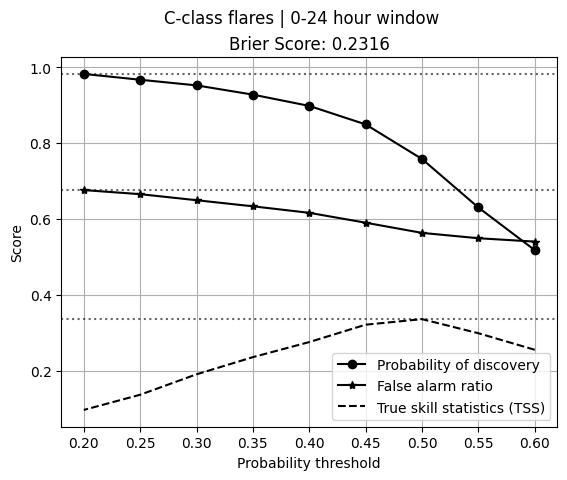

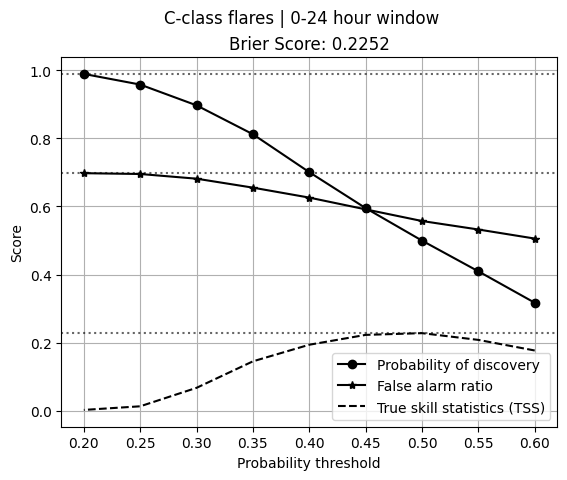

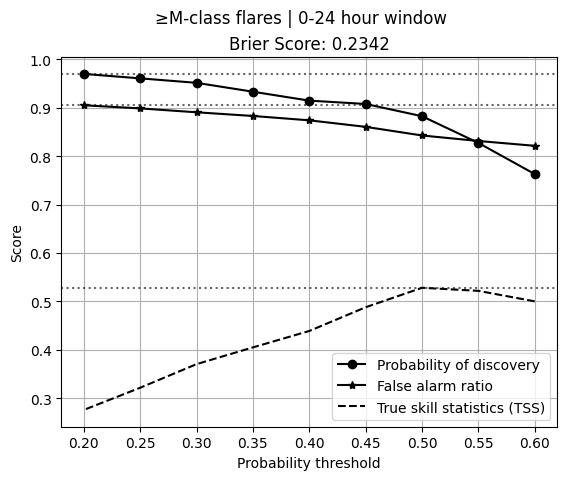

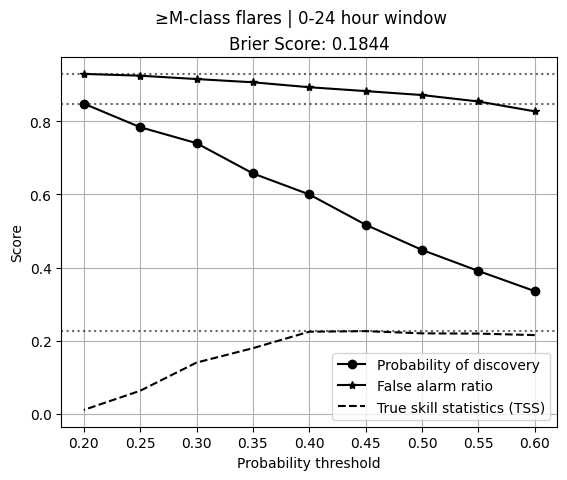

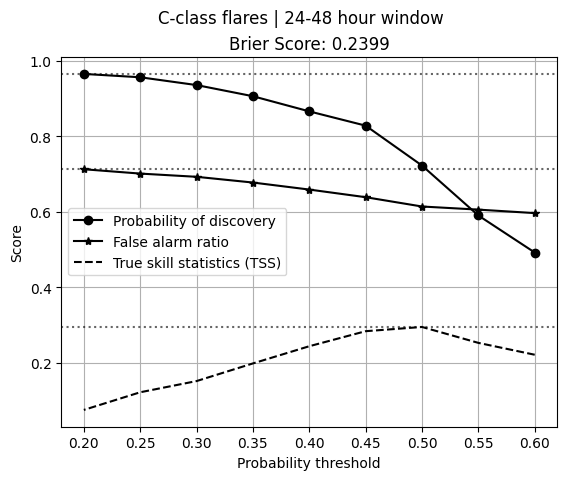

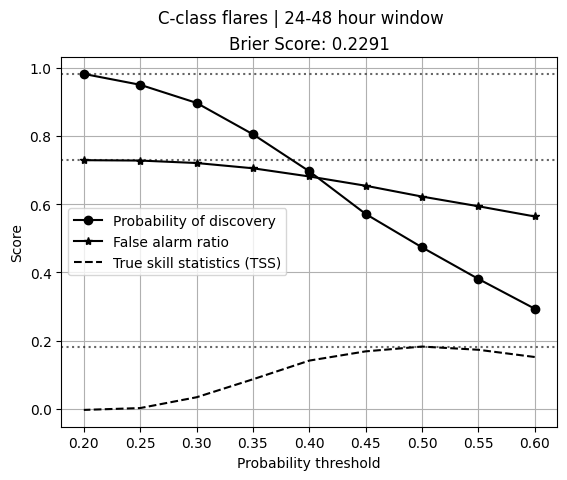

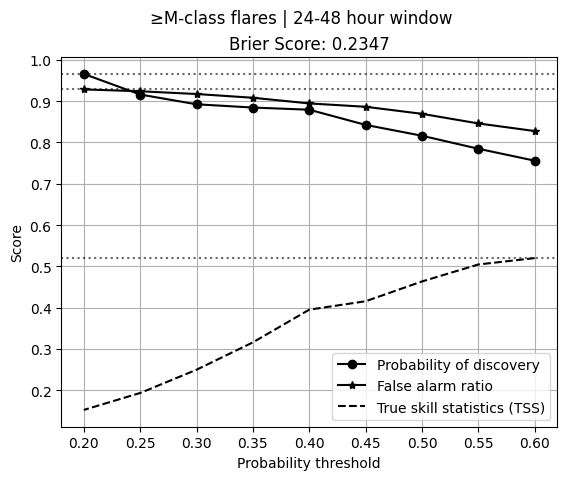

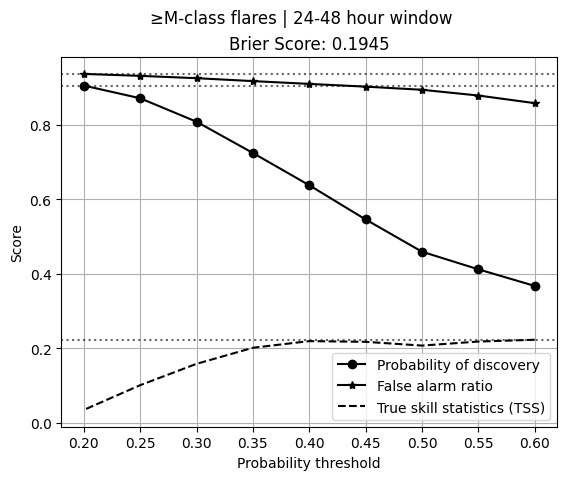

[2025-08-03 13:05:52] [logreg] INFO - ROC-кривая для is_C_24 сохранена.
[2025-08-03 13:05:53] [logreg] INFO - ROC-кривая для Mplus_24 сохранена.
[2025-08-03 13:05:53] [logreg] INFO - ROC-кривая для is_C_48 сохранена.
[2025-08-03 13:05:54] [logreg] INFO - ROC-кривая для Mplus_48 сохранена.


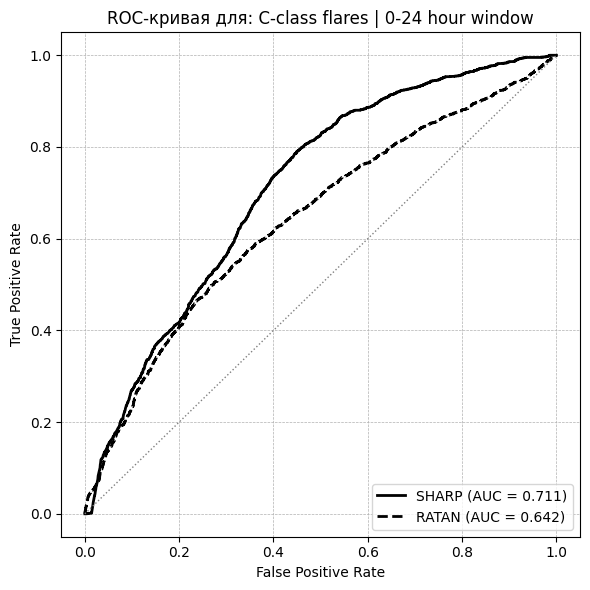

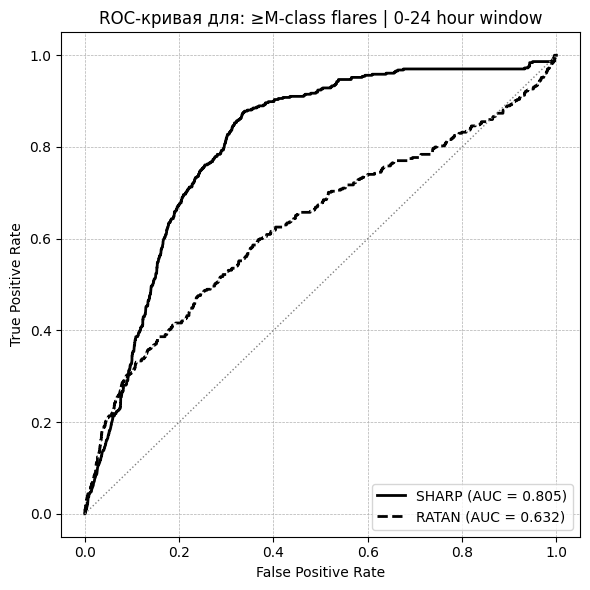

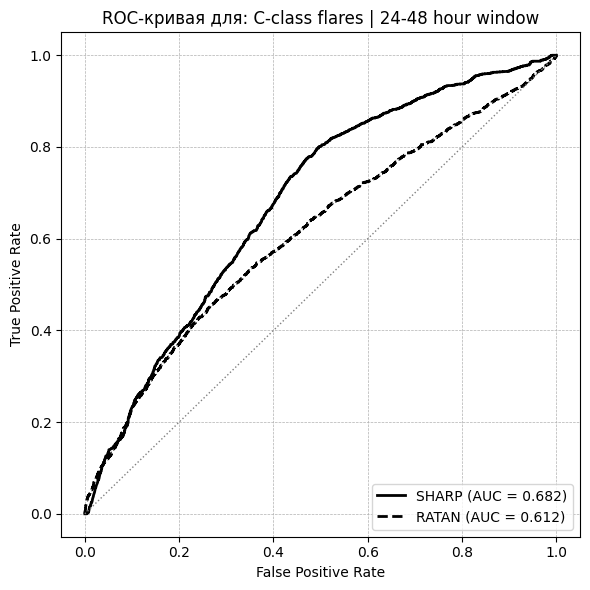

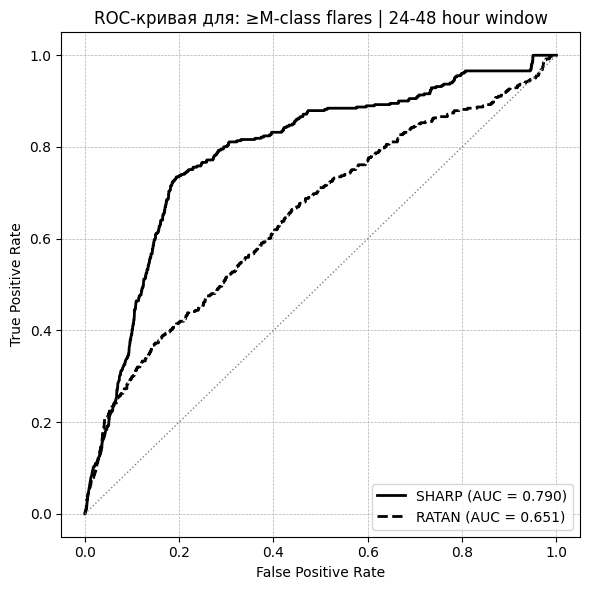

In [8]:
pipeline_steps.evaluate_and_visualize_logreg(config)